# (Collisional excitation / collisional de-excitation) + (radiative ionization / radiatve recombination + dielectronic recombination)

In [1]:
import sys

sys.path.insert(0, "../")

import numpy as np

import lss

In [2]:
spectrum = lss.BlackBodyPlanck()
spectrum.temperature = 5778.0
spectrum.total_area = 1367.0

# spectrum = lss.SunGueymard()

# spectrum = lss.Kelt9Fossati()

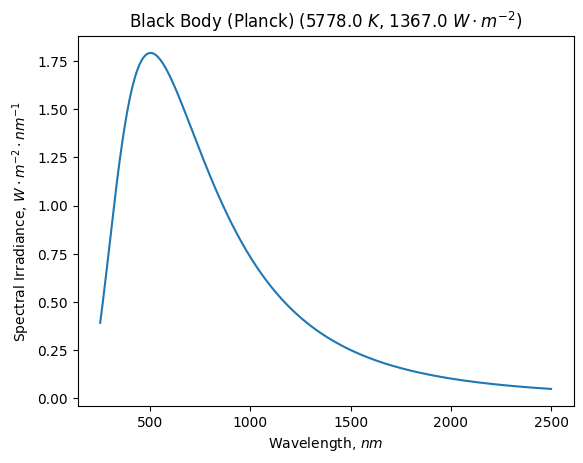

In [3]:
lss.plot_spectrum(
    spectrum,
    wavelengths=np.linspace(250, 2500, int(1e3)),
)

In [4]:
elements = [
    lss.O1Mashonkina(),
    lss.O2Mashonkina(),
]
# elements[0].keys = elements[0].all_keys; elements[1].keys = elements[1].all_keys
# elements[0].keys = ["12P3P4", "12P1D4"]; elements[1].keys = ["22P4S"]
# elements[0].keys = ["12P3P4", "13S3S"]; elements[1].keys = ["22P4S"]
elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]; elements[1].keys = ["22P4S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
# population_nlte_1[0] = 1.0
# population_nlte_1[0] = 0.5
# population_nlte_1[1] = 0.0
# population_nlte_1[2] = 0.5
population_nlte_1[0] = 0.4
population_nlte_1[1] = 0.1
population_nlte_1[2] = 0.1
population_nlte_1[3] = 0.4

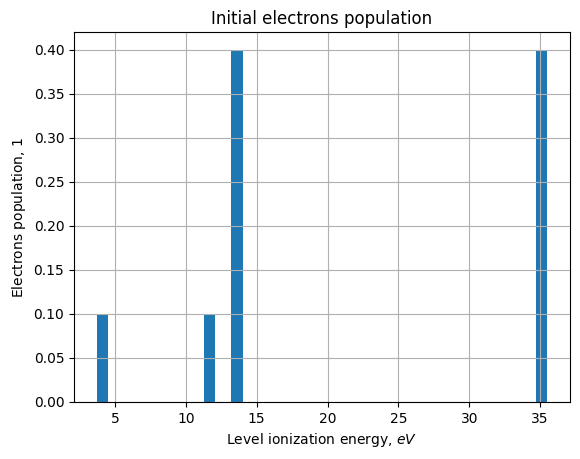

In [5]:
lss.plot_population(
    elements,
    population=population_nlte_1,
    title="Initial electrons population"
)

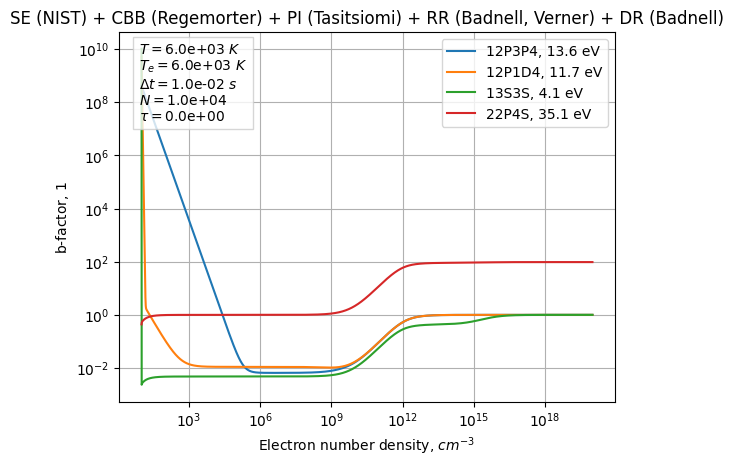

In [6]:
lss.plot_b_factor_electron_number_density(
    elements,
    population_nlte_1 = population_nlte_1,
    spectrum = spectrum,
    charge_transfer_elements = [],
    temperature = 6.0e3,
    electron_temperature = 6.0e3,
    electron_number_densities = np.geomspace(1.0e1, 1.0e20, num=int(1e4)),
    optical_depth = 0.0,
    delta_time = 1.0e-2,
    transitions_types = [
        lss.Transition.SE_NIST_O1,
        lss.Transition.CBB_REGEMORTER,
        lss.Transition.PI_TASITSIOMI,
        lss.Transition.RR_BADNELL_VERNER,
        lss.Transition.DR_BADNELL,
    ],
    legend_1_loc = 'upper right',
    legend_2_loc = 'upper left',
)